# Search Evaluation Notebook

This python notebook will perform a search evaluation 
Prerequisites:
* Golden data set in file ```golden_data.csv```
* Search strategies in python modules located in the ```strategies``` folder

In [ ]:
import requests
from io import StringIO
from dotenv import load_dotenv
import os, subprocess

# Export the API key to an environment variable
if not os.path.exists('.env.instruqt'):
    env_text = requests.get('http://kubernetes-vm:9000/env').text
    with open('.env.instruqt', 'w') as f:
        f.write(env_text)
load_dotenv('.env.instruqt')

openai_api_key =  os.environ.get("LLM_APIKEY") 
url = os.environ.get("LLM_PROXY_URL") 
openai_api_base = f"https://{url}"

os.environ["OPENAI_API_KEY"] = openai_api_key
os.environ["OPENAI_BASE_URL"] = openai_api_base

subprocess.run([
    "deepeval", "set-local-model", 
    "--model-name=eval-gpt-4o", ## needs azure 2024-11-20 +
    f"--base-url={openai_api_base}", 
    f"--api-key={openai_api_key}"
    f""])

# # # ## Uncomment the following lines if you want to use .env file to control settings
# load_dotenv()   


True

In [2]:
### What files to work with
GOLDEN_DATA_CSV = "judgement_list.csv"
STRATEGIES_FOLDER = "strategies"
SEARCH_OUTPUT_JSON = "results_search_evaluation.json"
DEEPEVAL_OUTPUT_JSON = "results_deepeval_results.json"

In [3]:
## Run the Evaluation

from utility.util_es import get_es
from utility.util_vis_result import vis_search_eval_json, vis_deep_eval_correct_tests
from evaluate import run_search_evaluation, load_golden_data, load_strategies, output_search_eval_results

# https://www.elastic.co/guide/en/elasticsearch/reference/current/search-rank-eval.html
print("### Starting evaluation using Elasticsearch _rank_eval API")

# 1. Connect to Elasticsearch
es = get_es()
print(f"\tConnected to Elasticsearch version: {es.info()['version']['number']}")

# 2. Load the golden data set
golden_data = load_golden_data(GOLDEN_DATA_CSV)
print(f"\tIdentified {len(golden_data)} golden data entry(ies) to use for search evaluation")

# 3. Load strategies from the strategies folder
strategy_modules = load_strategies(STRATEGIES_FOLDER)  
print(f"\tIdentified {len(strategy_modules)} strategy(ies) to evaluate")

# 4. Evaluate each strategy
results = run_search_evaluation(es, golden_data, strategy_modules)

# 5. Output the evaluation results
output_search_eval_results(SEARCH_OUTPUT_JSON, results, golden_data, strategy_modules)



Using ES with configured Host and API key ...


/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site-packages/deepeval/__init__.py:53: UserWarning: You are using deepeval version 2.4.7, however version 2.7.1 is available. You should consider upgrading via the "pip install --upgrade deepeval" command.
  warnings.warn(


### Starting evaluation using Elasticsearch _rank_eval API
	Connected to Elasticsearch version: 8.17.4
	Identified 7 golden data entry(ies) to use for search evaluation
	Identified 5 strategy(ies) to evaluate
### SEARCH RANK EVAL
	Starting strategy: 1_default_bm25
	Starting strategy: 2_filtered_bm25
	Starting strategy: 3_default_e5
	Starting strategy: 4_e5
	Starting strategy: 5_e5_rrf
### Evaluation complete. 
	Results written to  results_search_evaluation.json


/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 23487 (\N{CJK UNIFIED IDEOGRAPH-5BBF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dave/dev/instruqt_cert_module6/genai-workshops/.venv/lib/python3.13/site

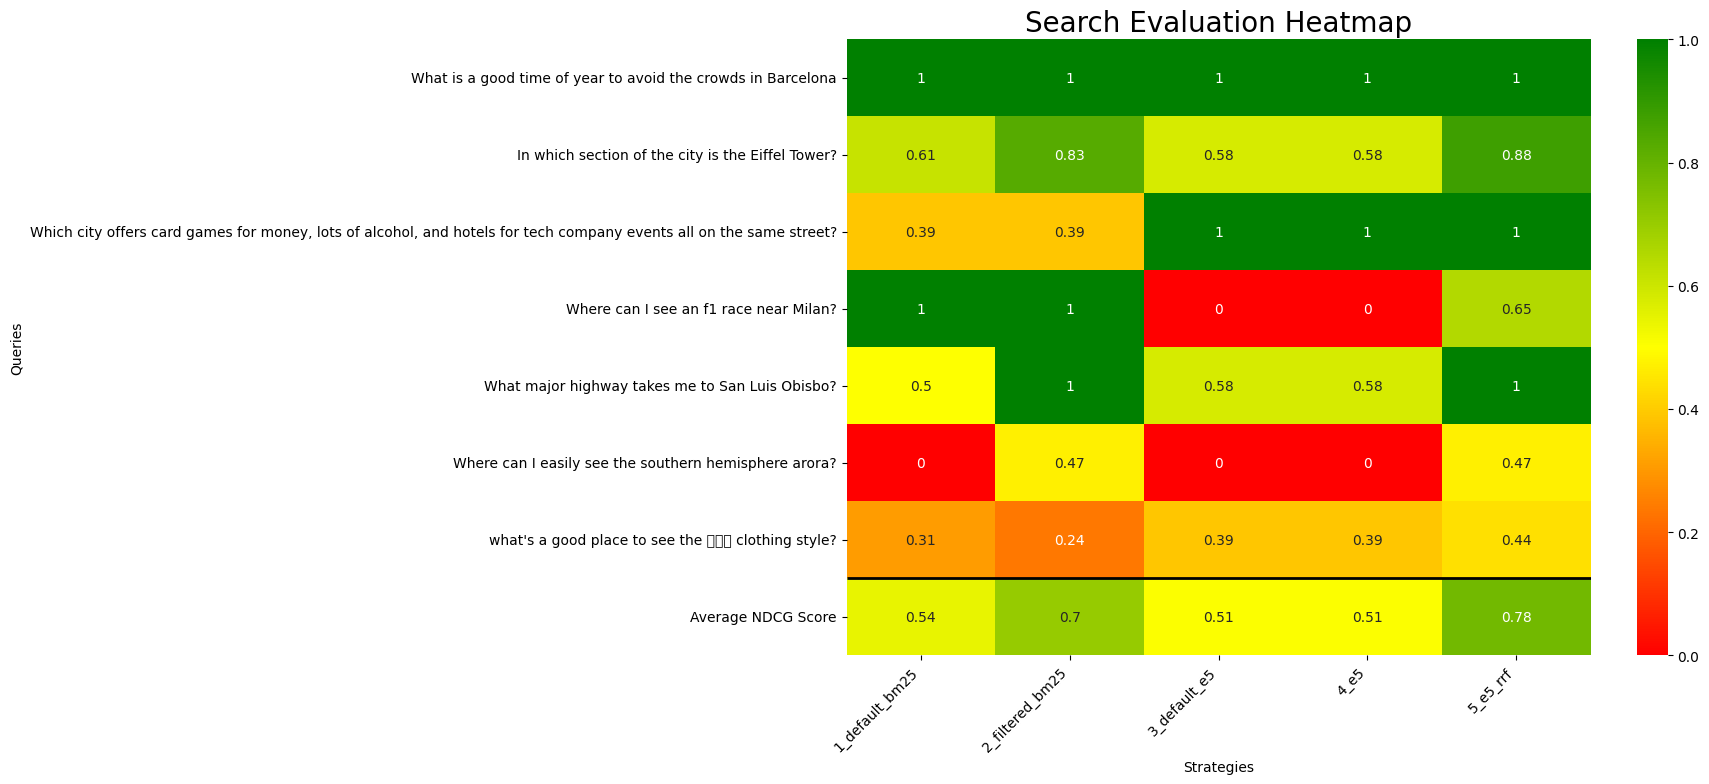

In [4]:
## Visualize the Results of the Evaluation
# 6. Visualize
vis_search_eval_json(SEARCH_OUTPUT_JSON)